In [109]:
#Import Libraries
import pandas as pd
import geopandas
import numpy as np

# Opening Datasets And Formating


In [110]:
#Neighborhood Data
Rent_Neighborhood=pd.read_csv('Vancouver_Neighborhood.csv')
Rent_Neighborhood = Rent_Neighborhood.replace('**', np.nan)
Rent_Neighborhood['Bachelor']=Rent_Neighborhood['Bachelor'].astype(float)
Rent_Neighborhood['1 Bedroom']=Rent_Neighborhood['1 Bedroom'].astype(float)
Rent_Neighborhood['2 Bedroom']=Rent_Neighborhood['2 Bedroom'].astype(float)
Rent_Neighborhood['3 Bedroom +']=Rent_Neighborhood['3 Bedroom +'].astype(float)
Rent_Neighborhood['Total']=Rent_Neighborhood['Total'].astype(float)

#Census Track Data
Rent_Census_Track=pd.read_csv('Census_TRack_Vancouver.csv')
Rent_Census_Track = Rent_Census_Track.replace('**', np.nan)
Rent_Census_Track['Bachelor']=Rent_Census_Track['Bachelor'].astype(float)
Rent_Census_Track['1 Bedroom']=Rent_Census_Track['1 Bedroom'].astype(float)
Rent_Census_Track['2 Bedroom']=Rent_Census_Track['2 Bedroom'].astype(float)
Rent_Census_Track['3 Bedroom +']=Rent_Census_Track['3 Bedroom +'].astype(float)
Rent_Census_Track['Total']=Rent_Census_Track['Total'].astype(float)
Rent_Census_Track=Rent_Census_Track[Rent_Census_Track['Census_Track'] != 'Vancouver']
Rent_Census_Track['Census_Track']=Rent_Census_Track['Census_Track'].astype(float)

#Opening Shapefiles - Neighborhood
Vancouver_Neighborhoods_shp=geopandas.read_file("CMHC_GV.shp")
Vancouver_Neighborhoods_shp=Vancouver_Neighborhoods_shp.rename(columns={"Name": "Neighborhood"})

#Opening Shapefiles - Census Track Data
Vancouver_Census_Track_shp=geopandas.read_file("CT_GV.shp")
Vancouver_Census_Track_shp['Census_Track']=Vancouver_Census_Track_shp['NAMES'].str.extract('.*\((.*)\).*')
Vancouver_Census_Track_shp['Census_Track']=Vancouver_Census_Track_shp['Census_Track'].astype(float)

In [111]:
# Merging Data Sets
Merged_Vancouver_Neighborhoods=Vancouver_Neighborhoods_shp.merge(Rent_Neighborhood, how='left', on='Neighborhood')
Merged_Vancouver_Census_Track=Vancouver_Census_Track_shp.merge(Rent_Census_Track, how='left', on='Census_Track')


In [112]:
#Exporting the Data

Merged_Vancouver_Neighborhoods.to_file(filename='Merged_Data_Neighborhoods.zip', driver='ESRI Shapefile')
Merged_Vancouver_Census_Track.to_file(filename='Merged_Data_Census_Track.zip', driver='ESRI Shapefile')



# Neighborhood Vacancy Rate


<AxesSubplot:>

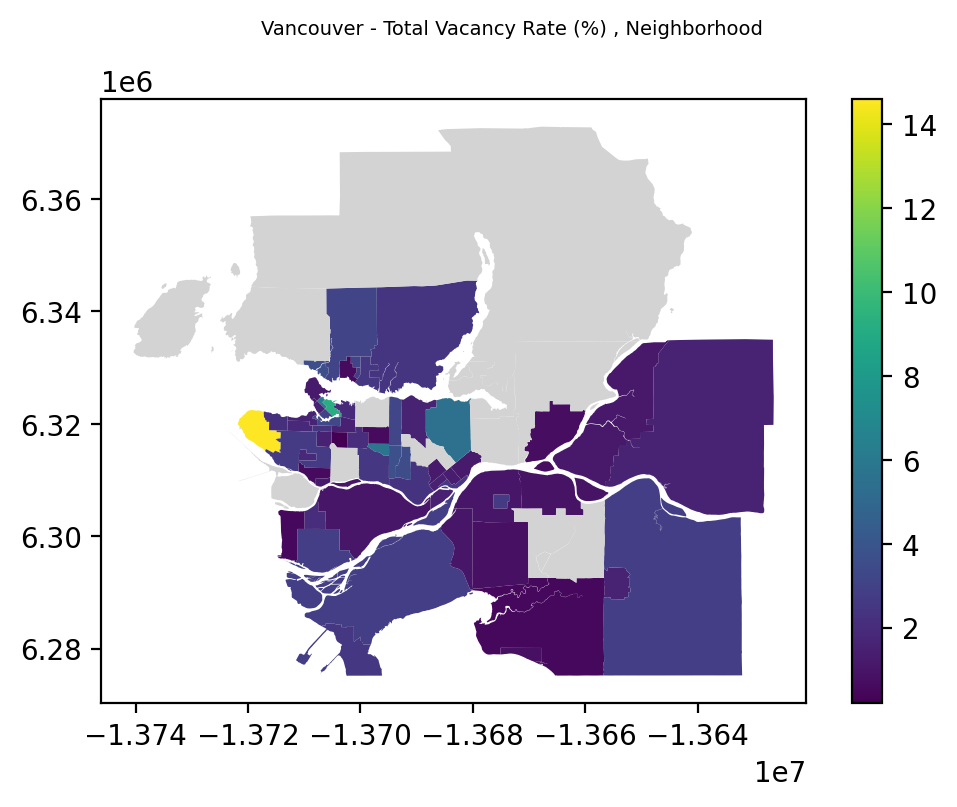

In [100]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200

#Map
fig, ax = plt.subplots(1, 1)
fig.suptitle("Vancouver - Total Vacancy Rate (%) , Neighborhood", fontsize=7)
Merged_Vancouver_Neighborhoods.plot(column='Total', ax=ax, legend=True,missing_kwds= dict(color = "lightgrey",))

<AxesSubplot:>

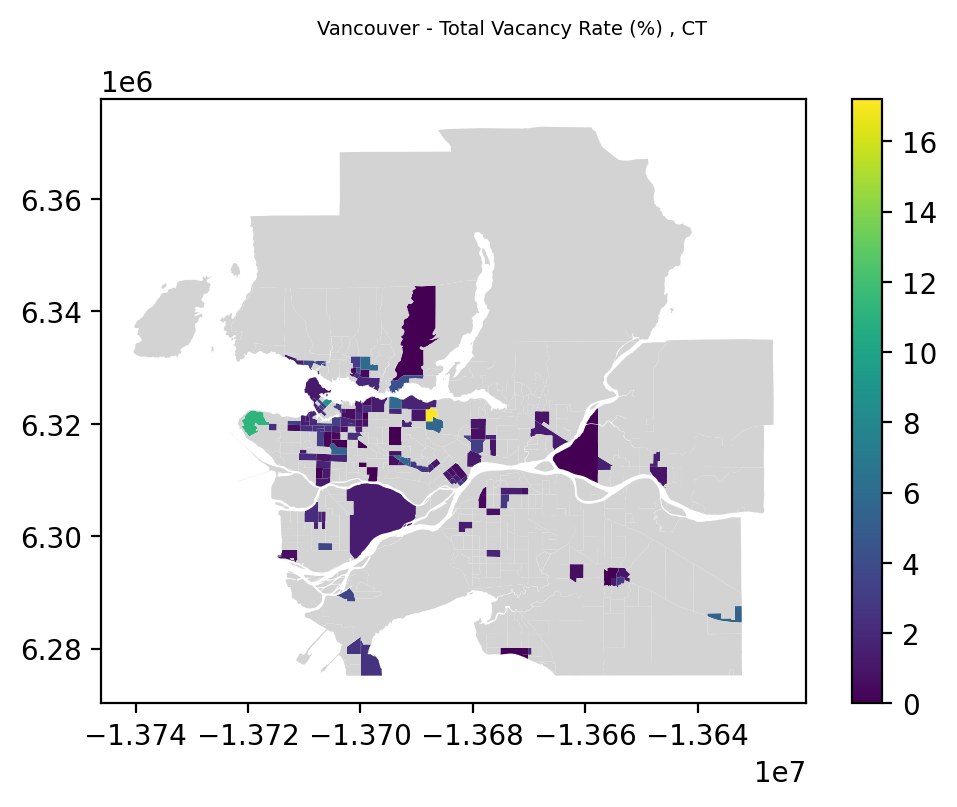

In [108]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200

#Map
fig, ax = plt.subplots(1, 1)
fig.suptitle("Vancouver - Total Vacancy Rate (%) , CT", fontsize=7)
Merged_Vancouver_Census_Track.plot(column='Total', ax=ax, legend=True,missing_kwds= dict(color = "lightgrey",))